In [1]:
#
# importing the necessary libraries:
# NumPy, plotting functions, and 
# a handler for csv files
#
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
#
# Values of sigma and level for tests
#
sigma_array = [0.0, 0.01, 0.05, 0.1, 0.15, 0.2]
level_array = [1.0, 0.95, 0.90, 0.85, 0.8, 0.7, 0.6, 0.5]

In [3]:
#
# Plotting parameters
#
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 100

In [4]:
#
# Plotting from GraNNI csv files with test statistics, data structure is assumed to have
# the right shape and no sanity checks are done 
#
def plot_granni_stats_from_csv(filename, stat_offsets=[1,1,1], cmap='tab20'):
    #
    file = open(filename, 'r')
    reader = csv.reader(file)
    #
    stats = []
    for line in reader:
        stats += [[RDF(v) for v in line]]
    #
    file.close()
    #
    coord_sigma  = [v[0] for v in stats]
    coord_level  = [v[1] for v in stats]
    value_err_L  = [v[4] for v in stats]
    value_err_Y  = [v[5] for v in stats]
    value_err_X  = [v[6] for v in stats]
    #
    stat_names  = ['err_L', 'err_Y', 'err_X']
    stat_values = [value_err_L, value_err_Y, value_err_X]
    stats = list(zip(stat_names, stat_values, stat_offsets))
    #
    for s in stats:
        print(s[0])
        values = s[1]
        offset = s[2]
        fig, ax = plt.subplots()
        color_matrix = np.reshape(np.array(values), (len(sigma_array), len(level_array)))
        if offset==1:
            color_matrix = color_matrix[:-1,:-1]
            pseudocolor = ax.pcolorfast(level_array, sigma_array, color_matrix, cmap=cmap)
        if offset > 1:
            color_matrix = color_matrix[:-offset,:-offset]
            off = offset - 1
            pseudocolor = ax.pcolorfast(level_array[:-off], sigma_array[:-off], color_matrix, cmap='tab20')
        fig.colorbar(pseudocolor)
        plt.show()
    #

In [5]:
#
# Plotting stats for numerical experiments with GraNNI
#

err_L


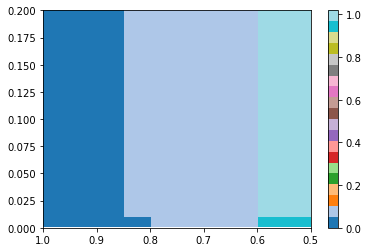

err_Y


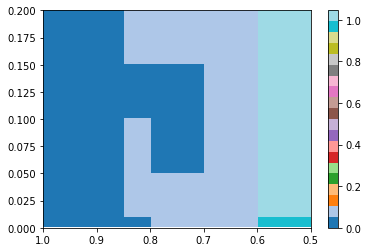

err_X


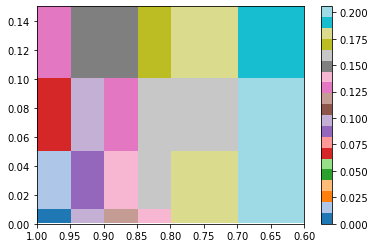

In [6]:
#
# Plotting GraNNI "Teapot" stats:
# 10 tests in a single batch with the same level and noise levels
#
# We offset the error in recovering X (= preimage) as it gets >> 1 for level > 0.5 and 
# noise > 0.15 (then all smaller values become blended into one)
#
plot_granni_stats_from_csv('GraNNI_stats_10_Teapot.csv', [1,1,2])

err_L


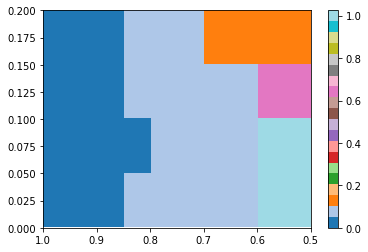

err_Y


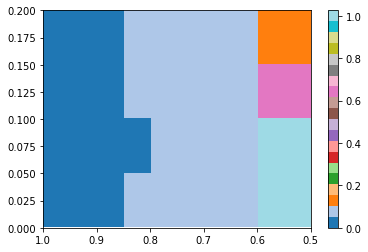

err_X


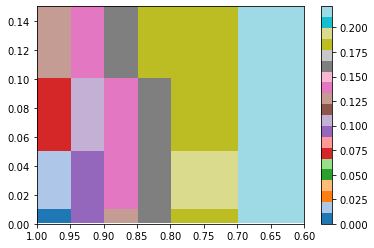

In [7]:
#
# Plotting GraNNI "Bunny" stats:
# 10 tests in a single batch with the same level and noise levels
#
# We offset the error in recovering X (= preimage) as it gets >> 1 for level > 0.5 and 
# noise > 0.15 (then all smaller values become blended into one)
#
plot_granni_stats_from_csv('GraNNI_stats_10_Bunny.csv', [1,1,2])

err_L


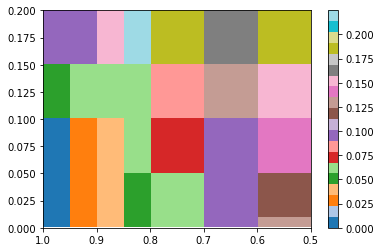

err_Y


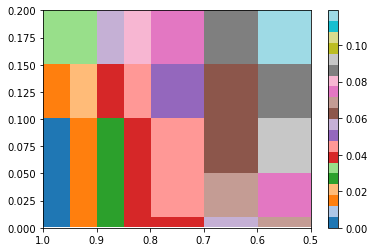

err_X


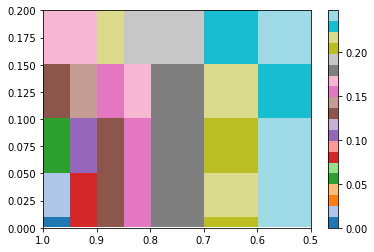

In [8]:
#
# Plotting GraNNI "Cow" stats:
# 10 tests in a single batch with the same level and noise levels
#
plot_granni_stats_from_csv('GraNNI_stats_10_Cow.csv', [1,1,1])

In [9]:
#
# Plotting from GrassGraph csv files with test statistics, data structure is assumed to have
# the right shape and no sanity checks are done 
#
def plot_gg_stats_from_csv(filename, cmap='tab20'):
    #
    file = open(filename, 'r')
    reader = csv.reader(file)
    #
    stats = []
    for line in reader:
        stats += [[RDF(v) for v in line]]
    #
    file.close()
    #
    coord_sigma  = [v[0] for v in stats]
    coord_level  = [v[1] for v in stats]
    value_err_L  = [v[4] for v in stats]
    value_err_Y  = [v[5] for v in stats]
    #
    stat_names  = ['err_L', 'err_Y']
    stat_values = [value_err_L, value_err_Y]
    stats = list(zip(stat_names, stat_values))
    #
    for s in stats:
        print(s[0])
        values = s[1]
        fig, ax = plt.subplots()
        color_matrix = np.reshape(np.array(values), (len(sigma_array), len(level_array)))
        color_matrix = color_matrix[:-1,:-1]
        pseudocolor = ax.pcolorfast(level_array, sigma_array, color_matrix, cmap=cmap)
        fig.colorbar(pseudocolor)
        plt.show()
    #

In [10]:
#
# Plotting stats for numerical experiments with GrassGraph
#

err_L


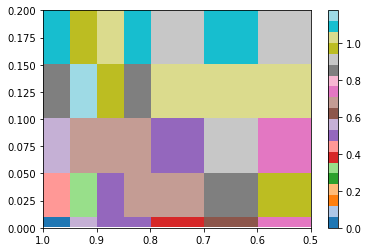

err_Y


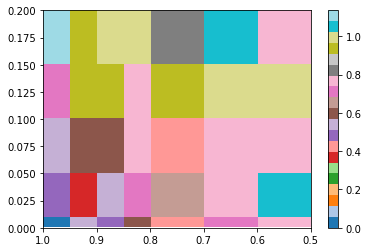

In [11]:
#
# Plotting GrassGraph "Teapot" stats:
# 10 tests in a single batch with the same level and noise levels
#  3 Laplacian eigenvectors used in each computation
#
plot_gg_stats_from_csv("GrassGraph_stats_Teapot.csv", cmap='tab20')

err_L


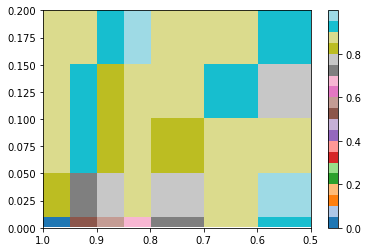

err_Y


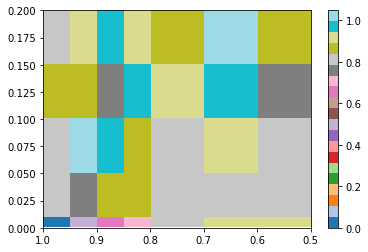

In [12]:
#
# Plotting GrassGraph "Bunny" stats:
# 10 tests in a single batch with the same level and noise levels
#  3 Laplacian eigenvectors used in each computation
#
plot_gg_stats_from_csv("GrassGraph_stats_Bunny.csv", cmap='tab20')

err_L


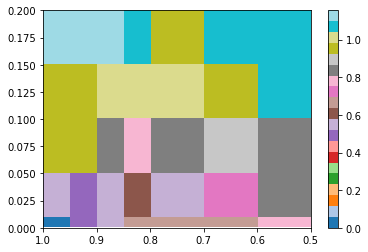

err_Y


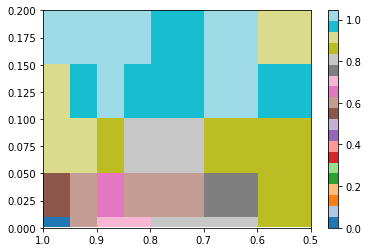

In [13]:
#
# Plotting GrassGraph "Cow" stats:
# 10 tests in a single batch with the same level and noise levels
#  3 Laplacian eigenvectors used in each computation
#
plot_gg_stats_from_csv("GrassGraph_stats_Cow.csv", cmap='tab20')